In [4]:
'''
Approaches:

1) Clustering
    - K-Means
    - Spectral
    - AgglomerativeClustering (Hierarchical)
2) Isolation Forest
3) Restricted Boltzmann Machine

Benchmarking:

1) 

'''


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

df = pd.read_csv("all data/citizen/kerala.csv")

df = df[df["Species_name"] == "Mango (all varieties)-Mangifera indica"]
df = df.drop(["Date_of_observation", "Observation_ID", "User_id", "User_Tree_id"], axis=1)

df = df[df["Year"] == 2023]
df = df[df["Week"] == 1]

kp = KPrototypes(n_clusters=1, init='Huang', n_init=10, verbose=1)

df_noNaN = df.dropna()
df_noNaN = df_noNaN.drop(["Flowers_male", "Flowers_Female", "Fruits_open", "Species_name", "Year", "Week"], axis=1)

df_noNaN = df_noNaN[~df_noNaN.isin([-2.0, -1.0]).any(axis=1)]

#df_noNaN["Flowers_male"] = -2.0
#df_noNaN["Flowers_Female"] = -2.0
#df_noNaN["Fruits_open"] = -2.0

df_noNaN # dataframe for Mango (all varieties)-Mangifera indica for week 1, 2023

,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Fruits_unripe,Fruits_ripe,Lat,Long
254837,1.0,1.0,1.0,0.0,0.0,2.0,1.0,10.79181,76.49968
255118,1.0,2.0,1.0,2.0,2.0,1.0,0.0,10.81909,76.67340
255854,2.0,2.0,1.0,1.0,1.0,1.0,0.0,11.06606,76.39845
256050,1.0,2.0,1.0,1.0,1.0,1.0,0.0,11.00291,76.37675
256579,0.0,2.0,0.0,1.0,0.0,0.0,0.0,8.80506,76.70144
...,...,...,...,...,...,...,...,...,...
319874,1.0,2.0,1.0,0.0,0.0,0.0,0.0,11.42119,75.97400
319897,1.0,2.0,1.0,0.0,0.0,2.0,2.0,11.40750,76.01169
324093,2.0,2.0,1.0,1.0,2.0,1.0,0.0,11.00592,76.01810
324836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.20075,76.78678


In [5]:
df_noNaN = df_noNaN.reset_index(drop=True)
clusters = kp.fit_predict(df_noNaN, categorical=[0])

centroids = kp.cluster_centroids_

distances = []

for i, row in df_noNaN.iterrows():
    cluster_label = clusters[i]
    centroid = centroids[0]
    relevant_values = row.values[:len(row.values)]
    float_centroid = [float(val) for val in centroid[:len(centroid)]]
    distance = np.linalg.norm(relevant_values - float_centroid)
    distances.append(distance)

print(distances)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 9966.629676824201
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 9966.629676824201
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 9966.629676824201
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 9966.629676824201
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 9966.629676824201
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 9966.629676824201
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 0, ncost: 9966.629676824201
Init: initial

In [16]:
df_noNaN['Distance_to_Centroid'] = distances

std_dev_dist = df_noNaN['Distance_to_Centroid'].std()
mean = np.mean(df_noNaN["Distance_to_Centroid"])
var = df_noNaN["Distance_to_Centroid"].var()

print("Standard deviation of distance: ", std_dev_dist)
print("Mean: ", mean)
print("Variance: ", var)

filtered_df = df_noNaN[ (df_noNaN['Distance_to_Centroid'] >= mean - 1*std_dev_dist) & (df_noNaN['Distance_to_Centroid'] <= mean + 1*std_dev_dist)]
outlier_df = df_noNaN[(df_noNaN['Distance_to_Centroid'] < mean - 1*std_dev_dist) | (df_noNaN['Distance_to_Centroid'] > mean + 1 * std_dev_dist)]

display(filtered_df)
display(outlier_df)
pca = PCA(n_components=2)
components = pca.fit_transform(df_noNaN)

pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Plot showing clusters after PCA')
plt.show()

Standard deviation of distance:  3.837237355236151
Mean:  99.82768027028527
Variance:  14.724390520419734


,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Fruits_unripe,Fruits_ripe,Lat,Long,Predictions,Distance_to_Centroid
0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,10.79181,76.49968,-1,99.991635
1,1.0,2.0,1.0,2.0,2.0,1.0,0.0,10.81909,76.67340,1,100.202619
2,2.0,2.0,1.0,1.0,1.0,1.0,0.0,11.06606,76.39845,1,99.820538
3,1.0,2.0,1.0,1.0,1.0,1.0,0.0,11.00291,76.37675,1,99.848297
4,0.0,2.0,0.0,1.0,0.0,0.0,0.0,8.80506,76.70144,1,101.546736
5,0.0,2.0,0.0,0.0,1.0,2.0,0.0,8.83529,76.68671,-1,101.530372
6,0.0,2.0,0.0,1.0,2.0,1.0,0.0,8.80435,76.70084,-1,101.551097
7,1.0,2.0,1.0,1.0,1.0,0.0,0.0,10.81853,76.67283,1,100.189458
8,1.0,2.0,1.0,1.0,1.0,0.0,0.0,10.15570,76.25041,1,100.302211
9,1.0,2.0,1.0,2.0,2.0,1.0,0.0,9.57098,76.33085,1,100.758035


,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Fruits_unripe,Fruits_ripe,Lat,Long,Predictions,Distance_to_Centroid
54,1.0,2.0,1.0,1.0,1.0,1.0,0.0,25.24063,73.45485,-1,88.882644
55,1.0,2.0,1.0,1.0,1.0,0.0,0.0,25.24063,73.45485,-1,88.880708
60,0.0,2.0,1.0,0.0,0.0,1.0,0.0,10.60783,10.60783,-1,66.602835
120,0.0,2.0,1.0,1.0,1.0,2.0,0.0,10.60783,10.60783,-1,66.607517


ValueError: Length of values (186) does not match length of index (182)

/opt/anaconda3/envs/cs589/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


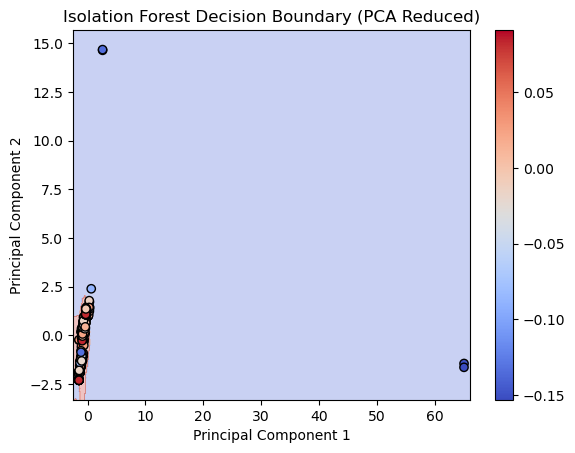

,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Fruits_unripe,Fruits_ripe,Lat,Long,Predictions,Isolation scores
120,0.0,2.0,1.0,1.0,1.0,2.0,0.0,10.60783,10.60783,-1,-0.152970
60,0.0,2.0,1.0,0.0,0.0,1.0,0.0,10.60783,10.60783,-1,-0.150076
108,0.0,1.0,2.0,0.0,1.0,1.0,1.0,9.14102,76.62026,-1,-0.148867
55,1.0,2.0,1.0,1.0,1.0,0.0,0.0,25.24063,73.45485,-1,-0.134066
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.20075,76.78678,-1,-0.132587
165,2.0,2.0,0.0,0.0,0.0,2.0,2.0,11.40856,75.98211,-1,-0.115388
54,1.0,2.0,1.0,1.0,1.0,1.0,0.0,25.24063,73.45485,-1,-0.112475
129,2.0,1.0,1.0,1.0,2.0,2.0,1.0,9.01218,76.76812,-1,-0.098072
47,2.0,1.0,0.0,2.0,2.0,1.0,1.0,10.01751,76.29219,-1,-0.095051
94,2.0,1.0,1.0,0.0,0.0,0.0,1.0,8.59425,76.94941,-1,-0.088788


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
import numpy as np

# df_noNaN = df_noNaN.drop(["Distance_to_Centroid"], axis=1)

model = IsolationForest(n_estimators = 500, verbose = 1, random_state = 42)

model.fit(df_noNaN)
preds = model.predict(df_noNaN)
df_noNaN["Predictions"] = preds
df_noNaN["Isolation scores"] = model.decision_function(df_noNaN)

pca = PCA(n_components=2)
components = pca.fit_transform(df_noNaN)

xx, yy = np.meshgrid(np.linspace(components[:, 0].min() - 1, components[:, 0].max() + 1, 500),
                     np.linspace(components[:, 1].min() - 1, components[:, 1].max() + 1, 500))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original_space = pca.inverse_transform(grid_points)

Z = model.predict(grid_points_original_space)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(components[:, 0], components[:, 1], c=df_noNaN['Isolation scores'], cmap='coolwarm', edgecolors='k')
plt.colorbar()
plt.title('Isolation Forest Decision Boundary (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

df_noNaN["Predictions"] = preds

pd.set_option("display.max_rows", 100000)
display(df_noNaN[df_noNaN["Predictions"] == -1].sort_values(by='Isolation scores', ascending=True))

In [34]:
# take the least isolated observation to be reference data
ref_data = df_noNaN.iloc[df_noNaN['Isolation scores'].idxmax()]
ref_data

Leaves_fresh         1.000000
Leaves_mature        2.000000
Leaves_old           1.000000
Flowers_bud          0.000000
Flowers_open         0.000000
Fruits_unripe        0.000000
Fruits_ripe          0.000000
Lat                 11.120270
Long                76.119900
Predictions          1.000000
Isolation scores     0.090934
Name: 63, dtype: float64

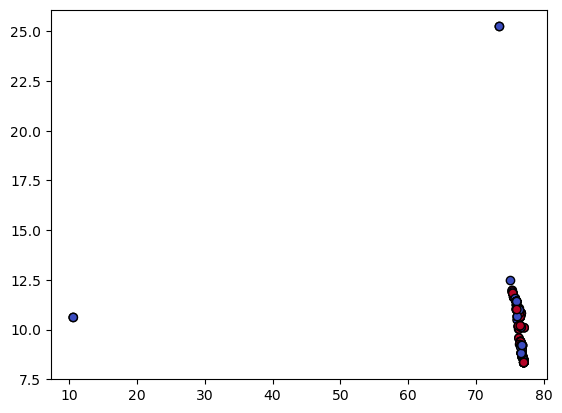

In [37]:
plt.scatter(df_noNaN['Long'], df_noNaN['Lat'], c=df_noNaN['Predictions'], cmap='coolwarm', edgecolors='k')

,Leaves_fresh,Leaves_mature,Leaves_old,Flowers_bud,Flowers_open,Fruits_unripe,Fruits_ripe,Flowers_male,Flowers_Female,Fruits_open,Predictions,Agglomerative Clustering
0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,-2.0,-2.0,-2.0,-1,1
1,1.0,2.0,1.0,2.0,2.0,1.0,0.0,-2.0,-2.0,-2.0,1,0
2,2.0,2.0,1.0,1.0,1.0,1.0,0.0,-2.0,-2.0,-2.0,-1,0
3,1.0,2.0,1.0,1.0,1.0,1.0,0.0,-2.0,-2.0,-2.0,1,0
4,0.0,2.0,0.0,1.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,-1,1
5,0.0,2.0,0.0,0.0,1.0,2.0,0.0,-2.0,-2.0,-2.0,-1,1
6,0.0,2.0,0.0,1.0,2.0,1.0,0.0,-2.0,-2.0,-2.0,-1,1
7,1.0,2.0,1.0,1.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,1,0
8,1.0,2.0,1.0,1.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,1,0
9,1.0,2.0,1.0,2.0,2.0,1.0,0.0,-2.0,-2.0,-2.0,1,0


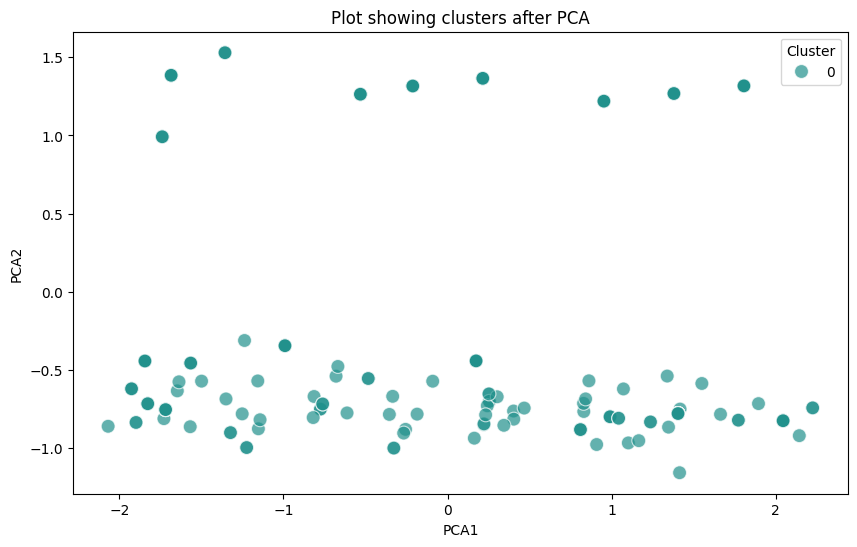

In [21]:
''' Agglomerative Clustering '''

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(compute_distances = True).fit(df_noNaN)
distances = clustering.distances_

#df_noNaN['Distances'] = distances
df_noNaN['Agglomerative Clustering'] = clustering.labels_

display(df_noNaN)

pca = PCA(n_components=2)
components = pca.fit_transform(df_noNaN)

pca_df = pd.DataFrame(data=components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Plot showing clusters after PCA')
plt.show()

In [ ]:
''' Spectral Clustering '''

